In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [15]:
column_names = ['ID', 
              'Diagnosis', 
              'radius_mean', 
              'texture_mean', 
              'perimeter_mean', 
              'area_mean', 
              'smoothness_mean', 
              'compactness_mean',
              'concavity_mean', 
              'concave_points_mean', 
              'symmetry_mean', 
              'fractal_dimension_mean',
              'radius_se', 
              'texture_se', 
              'perimeter_se', 
              'area_se', 
              'smoothness_se', 
              'compactness_se',
              'concavity_se', 
              'concave_points_se', 
              'symmetry_se', 
              'fractal_dimension_se',
              'radius_worst', 
              'texture_worst', 
              'perimeter_worst', 
              'area_worst', 
              'smoothness_worst', 
              'compactness_worst',
              'concavity_worst', 
              'concave_points_worst', 
              'symmetry_worst', 
              'fractal_dimension_worst']

df = pd.read_csv('wdbc.data')

In [22]:
df = df.rename(columns={'Diagnosis': 'Label'})

In [23]:
df

,ID,Label,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [24]:
df['Label'].value_counts()

B    357
M    212
Name: Label, dtype: int64

In [25]:
y = df['Label'].values

In [26]:
y

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [27]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [28]:
y = labelencoder.fit_transform(y)

In [29]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [31]:
X = df.drop(['ID', 'Label'], axis=1)

In [34]:
feature_names = np.array(X.columns)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [37]:
X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [39]:
import lightgbm as lgb
d_train = lgb.Dataset(X_train, y_train)

In [40]:
lgbm_params = {'learning_rate': 0.05,
               'boosting_type': 'gbdt',
               'objective': 'binary',
               'metric': ['auc', 'binary_logloss'],
               'num_leaves': 100,
               'max_depth': 10}

In [55]:
start_time = time.perf_counter()
clf = lgb.train(lgbm_params, d_train, 50)
stop_time = time.perf_counter()
print(f'Execution time = {stop_time-start_time} sec.')

[LightGBM] [Info] Number of positive: 171, number of negative: 284
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000439 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4542
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.375824 -> initscore=-0.507311
[LightGBM] [Info] Start training from score -0.507311
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [56]:
y_pred_lgbm = clf.predict(X_test)

In [57]:
y_pred_lgbm

array([0.03048021, 0.03032367, 0.95045335, 0.05360024, 0.94845896,
       0.10575013, 0.05163736, 0.06076629, 0.40113921, 0.29693543,
       0.03882979, 0.95166047, 0.84511089, 0.03044513, 0.91502672,
       0.03183607, 0.03545178, 0.04010727, 0.03036922, 0.0379154 ,
       0.94278085, 0.69850579, 0.03628024, 0.04709089, 0.03766261,
       0.95112601, 0.94573881, 0.03185284, 0.94984432, 0.03044832,
       0.34750725, 0.03233295, 0.03402508, 0.03048915, 0.95003589,
       0.03043278, 0.19282734, 0.03179105, 0.0364595 , 0.94495694,
       0.8069225 , 0.0357061 , 0.92412044, 0.04686754, 0.95144147,
       0.12836936, 0.941186  , 0.84077911, 0.82430252, 0.95052573,
       0.93359926, 0.93553764, 0.03377611, 0.03838153, 0.03061726,
       0.94653922, 0.03046164, 0.94753764, 0.95108233, 0.76462809,
       0.95032079, 0.03369703, 0.03251899, 0.03033456, 0.04002422,
       0.93978541, 0.0609677 , 0.05870115, 0.0672189 , 0.90368027,
       0.03033702, 0.03047597, 0.58045314, 0.0573111 , 0.93442

In [58]:
def rounding(x):
    if x >= 0.5:
        return 1
    else:
        return 0

In [59]:
pred_df = pd.DataFrame(y_pred_lgbm)
pred_df = np.array(pred_df[0].apply(rounding))

In [60]:
pred_df

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1], dtype=int64)

<AxesSubplot:>

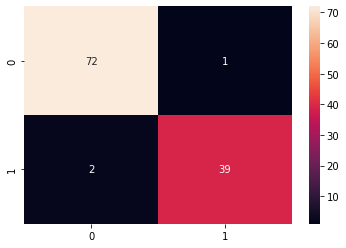

In [62]:
cm_lgbm = confusion_matrix(y_test, pred_df)
sns.heatmap(cm_lgbm, annot=True)

In [63]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, y_train)

In [66]:
xgb_params = {'objective': 'binary:logistic',
              'eval_metric': 'auc',
              'learning_rate': 0.05}

In [67]:
start_time = time.perf_counter()
xgb_clf = xgb.train(xgb_params, dtrain, 50)
stop_time = time.perf_counter()
print(f'Execution time = {stop_time-start_time} sec.')

Execution time = 0.06253379999907338 sec.


In [68]:
dtest = xgb.DMatrix(X_test)
y_pred_xgb = xgb_clf.predict(dtest)

In [70]:
y_pred_xgb
pred_xgb_df = pd.DataFrame(y_pred_xgb)
pred_xgb_df = np.array(pred_xgb_df[0].apply(rounding))

In [71]:
pred_xgb_df

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1], dtype=int64)

<AxesSubplot:>

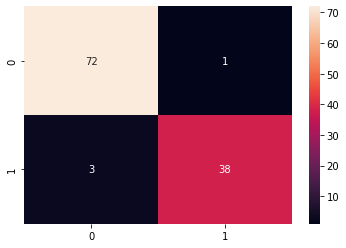

In [73]:
cm_xgbm = confusion_matrix(y_test, pred_xgb_df)
sns.heatmap(cm_xgbm, annot=True)